# ITCS 3162 Data Mining Project 3:

# Crop Yield Predictions

### Shan Raheim

#### **Kaggle Link for the Dataset:**
##### https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset?select=yield_df.csv

### Problem Introduction

For this project the main topic will be crop yield production.  Agricultural production is an essential topic in regards to meeting the demands and needs of growing populations. It impacts legislation, farmers, and businesses to make informed decisions about resource allocation, food security, and strategies to maximize agriculture production. Things like rain fall levels, weather conditions, pesticide use, and other possible environmental conditions. By having and using regression models to help predict yield information based on factors like rainfall levels can help predict and provide insights that will impact crop yields. It can help lower risks when it comes to crop production and influence within businesses and legislation. It can enhance global or local farming practices in different regions.
.

### Data Introduction

The dataset I used for this project is a Kaggle dataset called "Crop Yield Prediction Dataset".  The CSV used has over 10,000 rows and 8 columns. On the dataset's website there are different CSVs the creator listed but this project will be looking at the "yield_df" CSV since it holds the main information that will be used in this project.  It has the hg/ha_yield column which represents the respective crop's hectogram per hectare yield which is used to measure crop yields in agriculture, average_rain_fall, pesticides_tonnes, and avg_temp which will be the main columns used to predict crop yield.  This specific CSV is compiled from the others taking parts from each but using the most essential ones to create this particular CSV.  


### What is Linear Regression and How does it Work?

Linear regression is a data analysis method that predicts values of unknown data by using existing known data values that are related.  The model is based on linear equations where there is a dependent variable and independent variable. It works by plotting a line on a graph between 2 variables, x and y, x being the independent variable (or explanatory variable) and y being the dependent variable (the one you are trying to predict). In data and machine learning, linear regression is used with large datasets to predict patterns within the data.  It is trained with labeled data already made in the dataset then it is used to predict unknown values and a regression line is generated during this prediction.   
 

In [10]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [11]:
data_filepath = "../ITSC3162/yield_df.csv"
data = pd.read_csv(data_filepath)
df = pd.DataFrame(data)

df.shape
df.head(10)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


In [12]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [13]:
df.dtypes

Unnamed: 0                         int64
Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

### Data Pre-Processing and Understanding

Below I converted the data types for the columns that will be used to predict the crop yield for the regression model (average rain fall, pesticide tons, and average temperature) from floats to ints so the model can use them easier.

In [16]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype('int64')
df['pesticides_tonnes'] = df['pesticides_tonnes'].astype('int64')
df['avg_temp'] = df['avg_temp'].astype('int64')

Due to my dataset already being clean this eliminates this step from pre-processing. Since there were other CSVs in this datset the one I selected to use for this project simplified down the others and took the important information in them and put them in the one I chose.

#### Experiment 1 - Regression Model with all 3 Features (Average Rain Fall, Pesticide Amount, and Average Temperature

In [25]:
X = df[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df[['hg/ha_yield']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
model = linear_model.LinearRegression()
lr_model = model.fit(X_train, y_train)

In [21]:
model_sm = sm.OLS(y_train, X_train).fit()

print(model_sm.summary())

                                 OLS Regression Results                                
Dep. Variable:            hg/ha_yield   R-squared (uncentered):                   0.393
Model:                            OLS   Adj. R-squared (uncentered):              0.392
Method:                 Least Squares   F-statistic:                              4562.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                        0.00
Time:                        17:10:24   Log-Likelihood:                     -2.7149e+05
No. Observations:               21181   AIC:                                  5.430e+05
Df Residuals:                   21178   BIC:                                  5.430e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [22]:
y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred).round(2)
mse = mean_squared_error(y_test, y_pred).round(2)
mape = ((np.mean(np.abs(y_test-y_pred)/y_test) * 100)/len(df)).round(2)

print(f"MAE: {mae}\n MSE:{mse} \n MAPE:{mape}%.")

MAE: 64235.66
 MSE:7148053449.05 
 MAPE:0.01%.


With this first experiment a regression model was made with 3 features that include the average rainfall per year, average temperature, and pesticide amount. In a sense this can be viewed as the base model with all 3 variables impacting the regression prediction. Shown from the MAE the average absolute difference in the predicted values and actual values is about 64235, but since the data points in this set are large this needs to be taken into consideration with the point sizes which explains why it is a large number but it is not that big of a difference when viewed this way. The MSE is the average of the absolute errors which explains why it is so high due to again the data points in the crop yield being large values but it is a little tricky to understand since it is quite high due to the scaling. This is where the MAPE comes in handy since it is the percentage terms of the absolute difference between actual and predicted values and since it is 0.01% it shows that the model was highly accurate with predictions.  


#### Experiment 2 - Regression Model with 2 Features (Average Rain Fall and Pesticide Amount

In [27]:
X = X.drop(['avg_temp'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
model2_sm = sm.OLS(Y_train, X_train).fit()
print(model2_sm.summary())

                                 OLS Regression Results                                
Dep. Variable:            hg/ha_yield   R-squared (uncentered):                   0.340
Model:                            OLS   Adj. R-squared (uncentered):              0.340
Method:                 Least Squares   F-statistic:                              5453.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                        0.00
Time:                        17:12:11   Log-Likelihood:                     -2.7237e+05
No. Observations:               21181   AIC:                                  5.447e+05
Df Residuals:                   21179   BIC:                                  5.448e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [55]:
y_pred_2 = model2_sm.predict(X_test)

mae2 = mean_absolute_error(y_test, y_pred_2)
mse2 = mean_squared_error(y_test, y_pred_2)
mape2 = ((np.mean(np.abs(y_test-y_pred_2)/y_test) * 100)/len(df))

print(f"MAE: {mae2}\n MSE:{mse2} \n MAPE:{mape2}%.")

MAE: 1545041.9469582248
 MSE:8803690270604.94 
 MAPE:nan%.


In this experiment, the regression model was built with only two features to experiment with what differences would be shown when the average temperature feature was dropped. The MAE changed drastically showing that without the average temperature feature the difference in the predicted and actual values increases. Same for the MSE, it increased drastically as well showing the influence the average temperature had on the prediction for the crop yield.  The difference in the MSE explains that the average error for the data is higher due to the removal of the average temperature feature. Overall though it was shown with the MAPE that the predicted percentage is so small the model could not accurately represent it showing that even though the previous values changed the accuracy in the model did not worsen if anything it improved with less features. 

#### Experiment 3 - Regression Model with only 1 Feature (Average Rain Fall)

In [31]:
X = X.drop(['pesticides_tonnes'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
model3_sm = sm.OLS(Y_train, X_train).fit()
print(model3_sm.summary())

                                 OLS Regression Results                                
Dep. Variable:            hg/ha_yield   R-squared (uncentered):                   0.329
Model:                            OLS   Adj. R-squared (uncentered):              0.329
Method:                 Least Squares   F-statistic:                          1.038e+04
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                        0.00
Time:                        17:13:56   Log-Likelihood:                     -2.7255e+05
No. Observations:               21181   AIC:                                  5.451e+05
Df Residuals:                   21180   BIC:                                  5.451e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [73]:
y_pred_3 = model3_sm.predict(X_test)

mae3 = mean_absolute_error(y_test, y_pred_3)
mse3 = mean_squared_error(y_test, y_pred_3)
mape3 = ((np.mean(np.abs(y_test-y_pred_3)/y_test) * 100)/len(df))

print(f"MAE: {mae3}\n MSE:{mse3} \n MAPE:{mape3}%.")

MAE: 64225.99152682149
 MSE:8192970155.835913 
 MAPE:nan%.


With this last experiment the pesticide amount was dropped and the only feature impacting the regression prediction was average rainfall per year. Compared to the last experiment the MAE dropped but the MSE did not change much indicating that difference in the actual and predicted values was not as large as the last experiment which could be since there is less data to take into the prediction. The average absolute error between the points was similar to the last experiment but also the MAPE which is the same prediction as the last, it was so small to the point the model could not print it out showing the accuracy was still high.


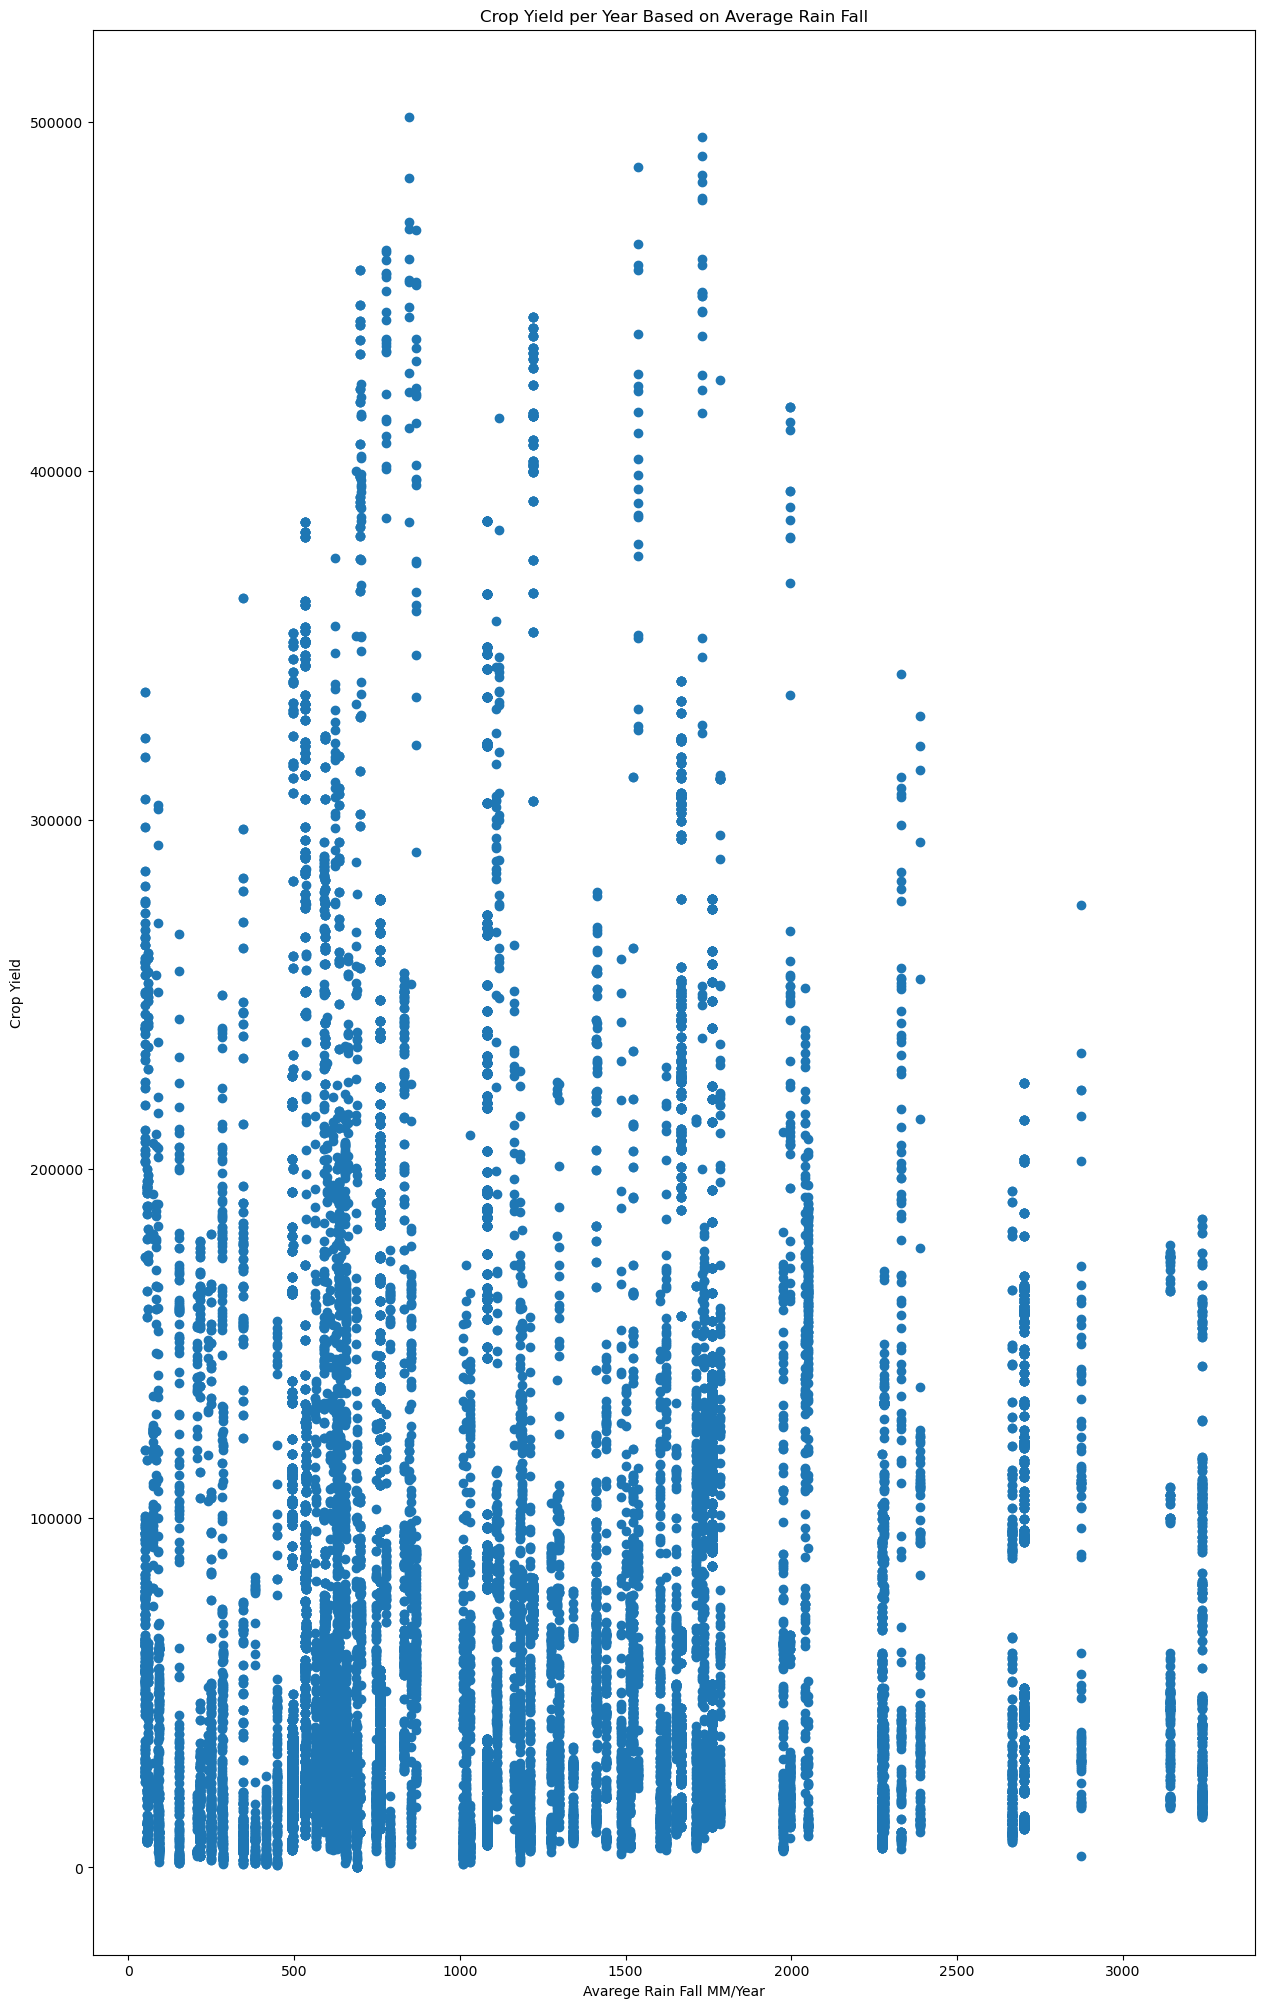

In [80]:
plt.figure(figsize=(15,25))
plt.scatter(df['average_rain_fall_mm_per_year'], df['hg/ha_yield'])
plt.xlabel('Avarege Rain Fall MM/Year')
plt.ylabel('Crop Yield')
plt.title('Crop Yield per Year Based on Average Rain Fall')
plt.show()

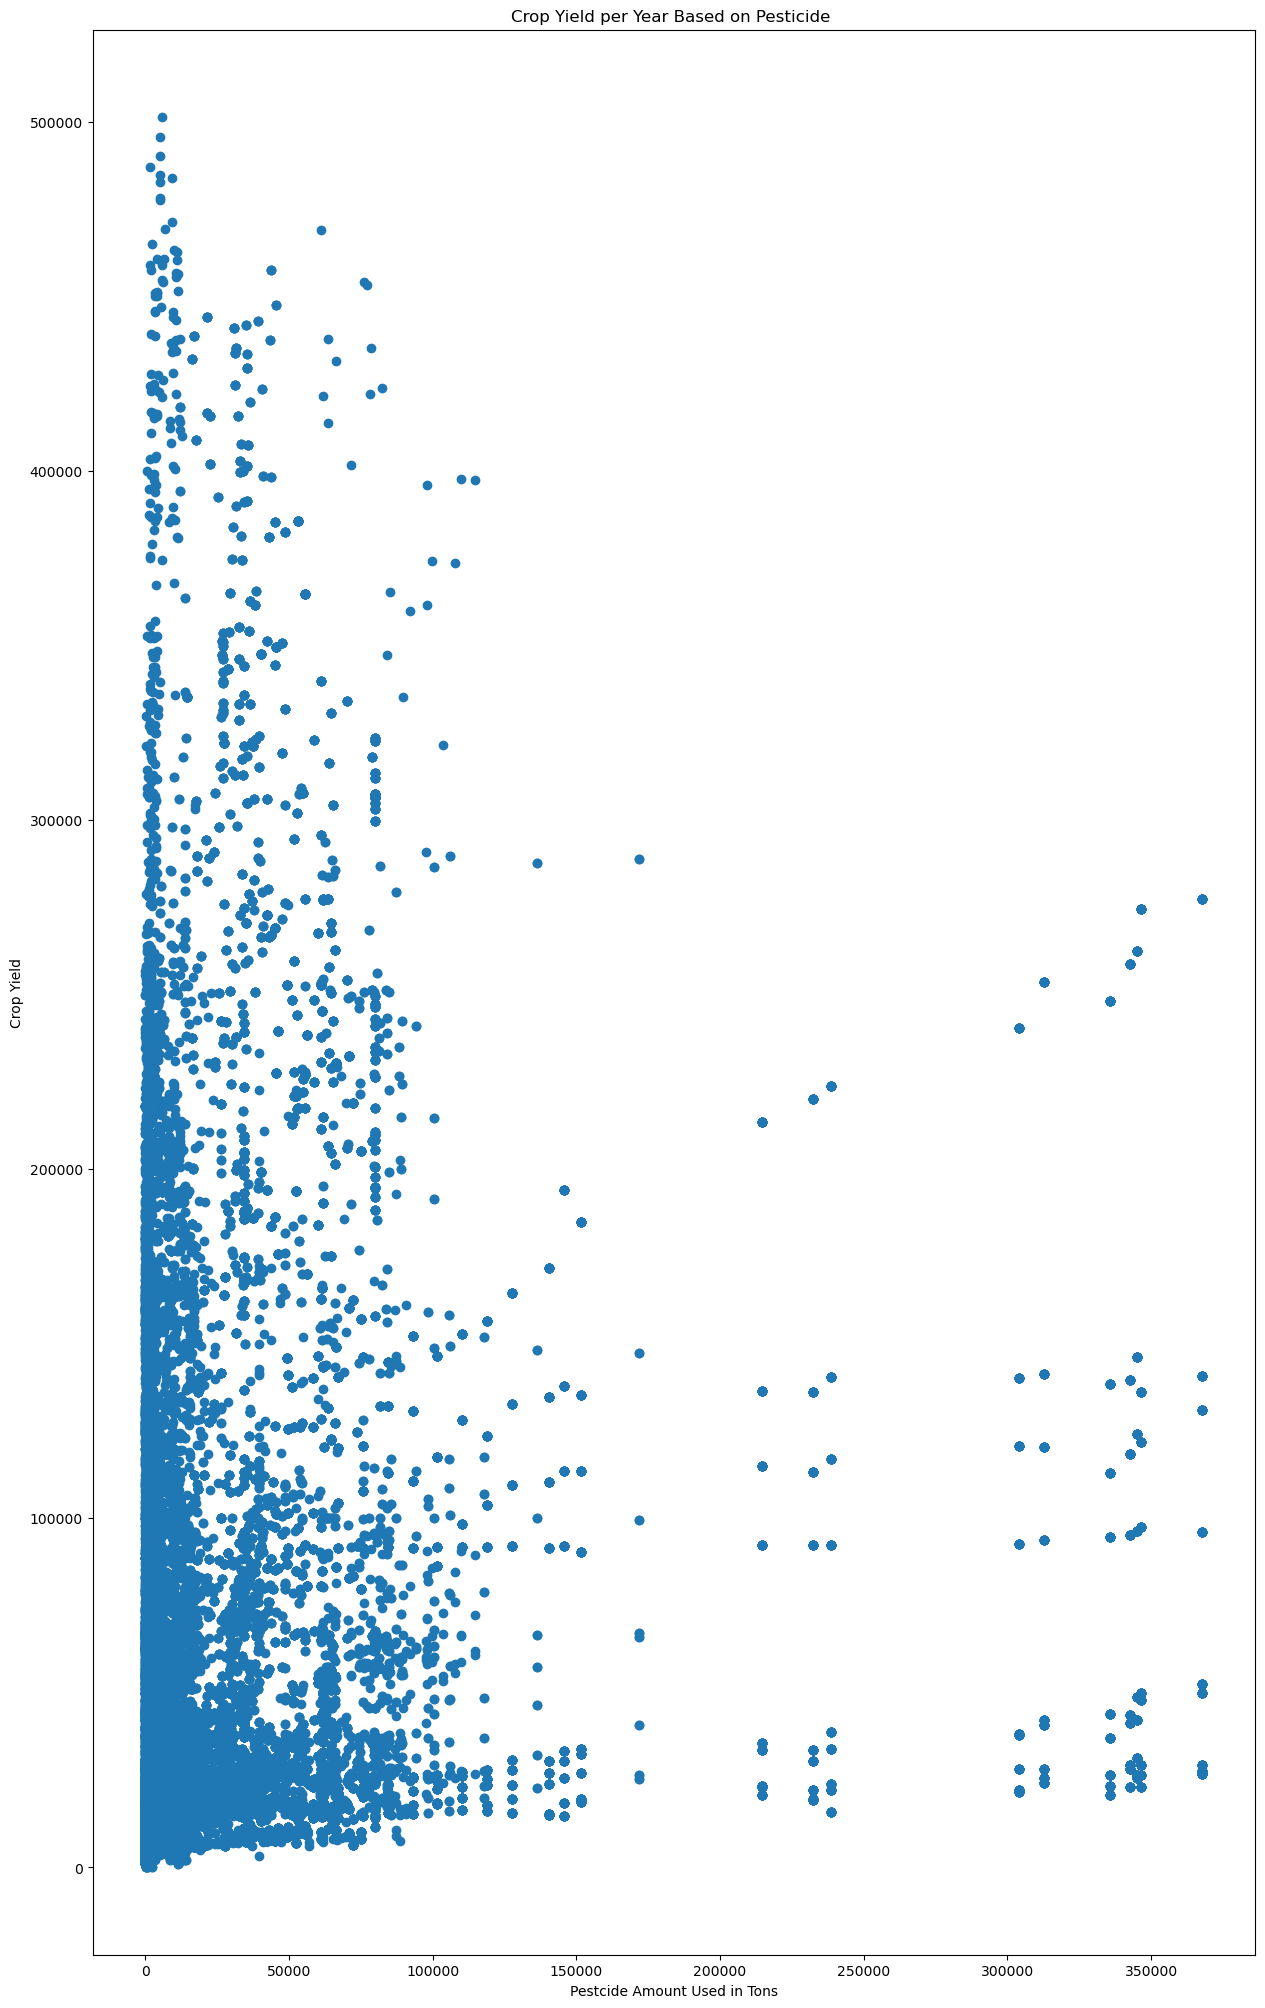

In [82]:
plt.figure(figsize=(15,25))
plt.scatter(df['pesticides_tonnes'], df['hg/ha_yield'])
plt.xlabel('Pestcide Amount Used in Tons')
plt.ylabel('Crop Yield')
plt.title('Crop Yield per Year Based on Pesticide ')
plt.show()

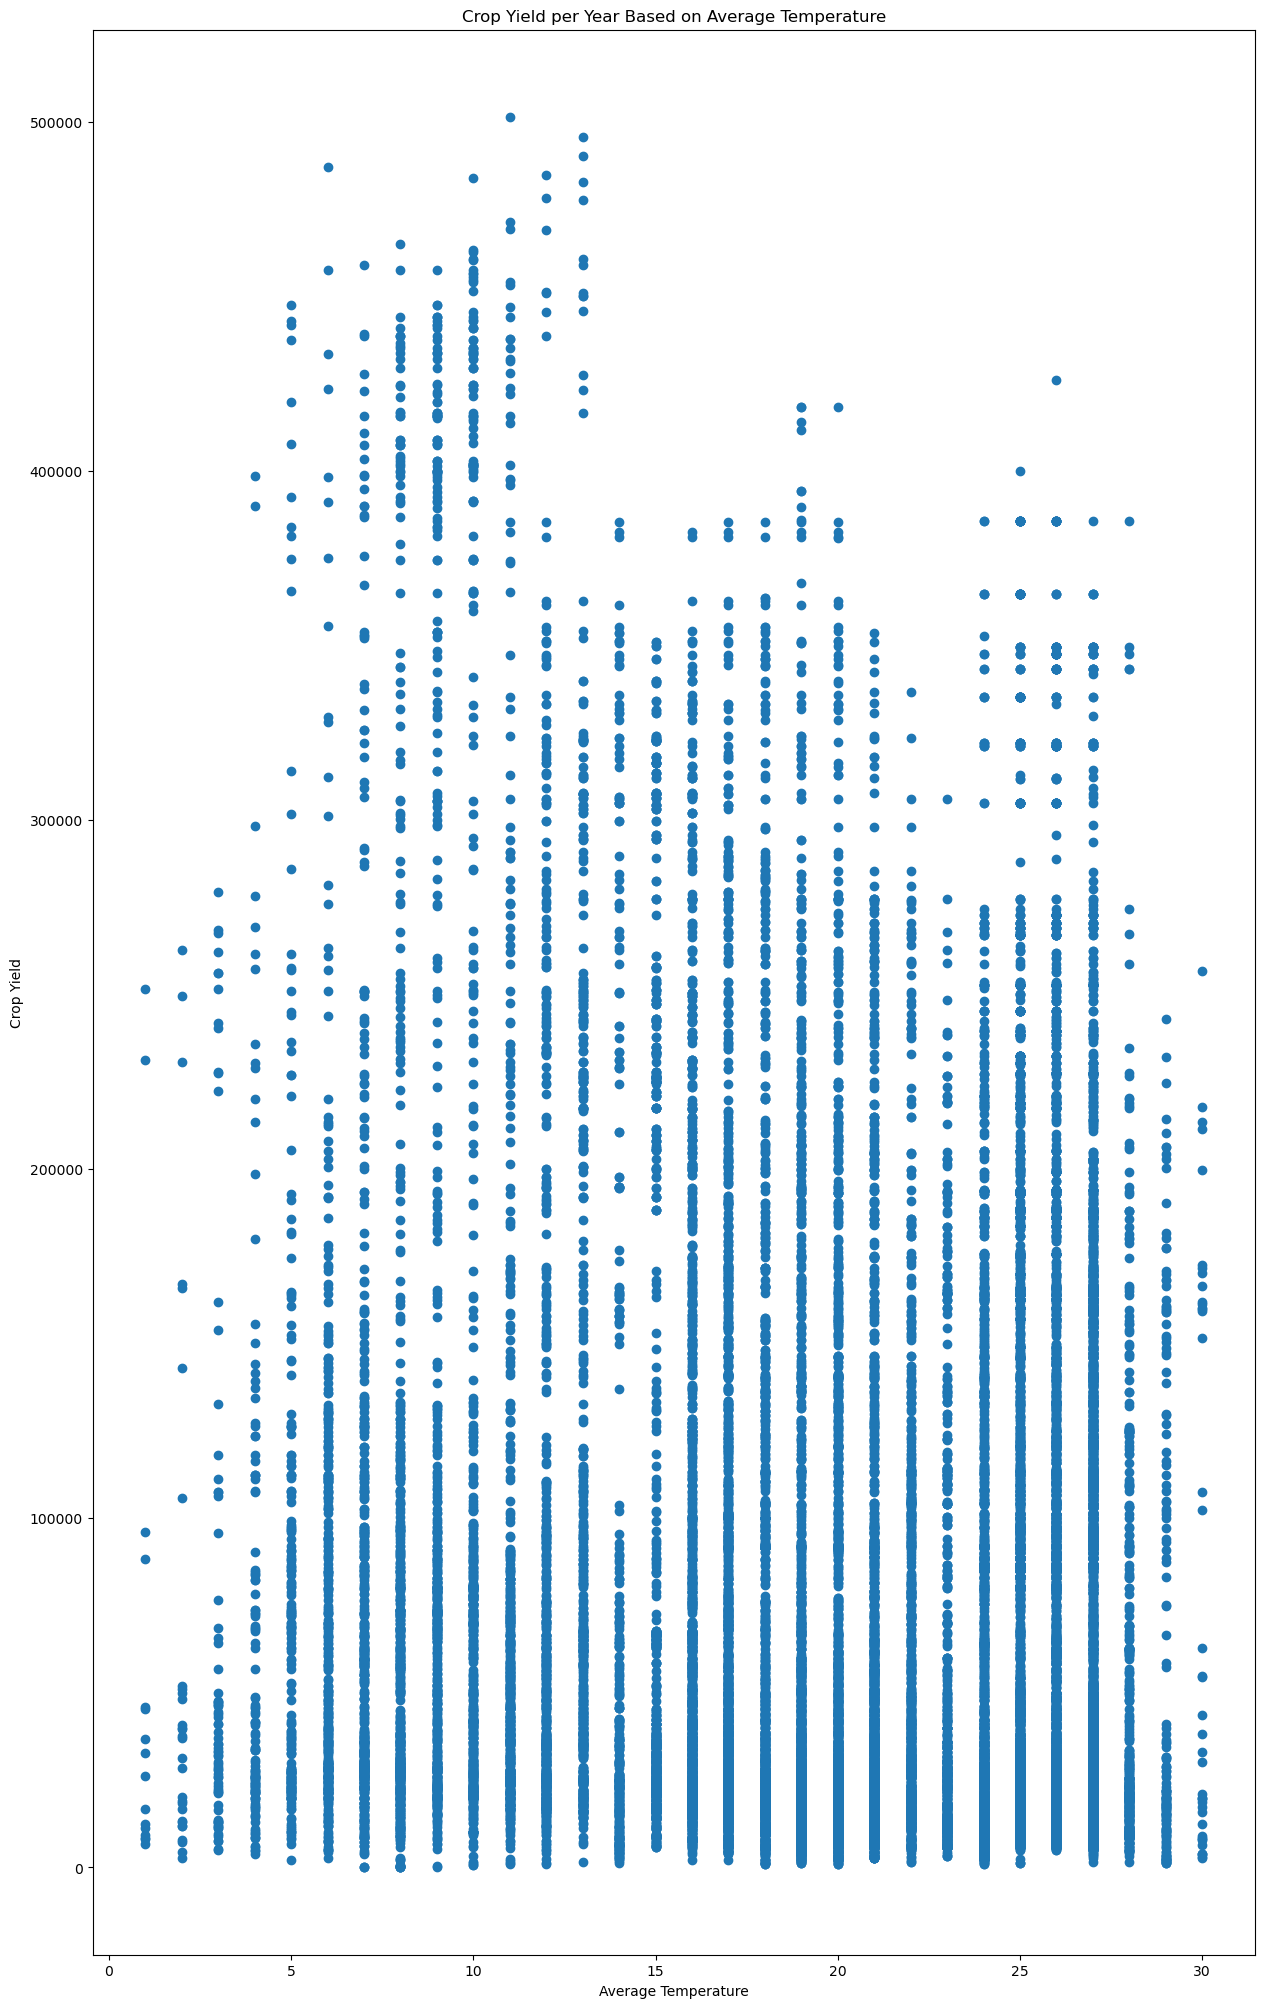

In [84]:
plt.figure(figsize=(15,25))
plt.scatter(df['avg_temp'], df['hg/ha_yield'])
plt.xlabel('Average Temperature')
plt.ylabel('Crop Yield')
plt.title('Crop Yield per Year Based on Average Temperature')
plt.show()

#### Impact 

The impact this project serves is that it could help make major decisions with agriculture topics globally taken into perspective. It explains the prediction of crop yields with key features that impact crop growth and production. With these selected features it explains the relation and impact they have on each other and the overall target of crop yield. Depending on regions with different circumstances it can explain the crop yield amounts respectively but also taking  into account if one of the mentioned features was altered or impacted in any way. Risk can predict if any decisions in legislation or agriculture methods impact crop yield explaining future food security and sustainability for a growing population. 


### References 

#### https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset?select=yield_df.csv
#### https://aws.amazon.com/what-is/linear-regression/#:~:text=Linear%20regression%20is%20a%20data,variable%20as%20a%20linear%20equation.